# Evaluating and Optimizing Machine Learning Techniques for Automatic Nuclei Detection

<b>1. Motivation</b>

Many people die from cancer every year. This is terribly sad. :’( We would like to prevent this. One option is to identify the cancer early; treatment of nascent cancers tends to be more successful. Often, cells suffering from cancer display different biomarkers in their nuclei. These biomarkers can be seen in immunohistochemical (IHC) imaging. If there were a rapid and accurate way to screen images for cancerous cells, many cancer prognoses could be improved. We aim to develop an automated cell nuclei detection technique.

<b>2. Challenges</b>

Imaging conditions can vary tremendously - illumination, contrast, fluorescence and staining will all affect the appearance of the cell. We would also like our technique to be generalizable to many cell types because cancer is insidious and affects many cell types. Depending on the biological sample that was imaged, cells may also be aggregated; where a trained eye could distinguish individual nuclei, an algorithm might falter. 

<b>3. Pre-treatment and Initial Segmentation (“Detection”)</b>

Colour is usually either normalized or thresholded to remove noise and background [1]. A variety of pre-processing techniques can be used to find objects, from conventional blob detection, to morphological and/or contour resolution, to watershed segmentation [2-4]. We will use sensible discretion to pick a pre-treatment technique.

<b>4. Segmentation and Identification</b>

There are two primary approaches to nuclei segmentation:

<b><i>Traditional methods segment nuclei from single or overlapping cells</i></b>

Several traditional methods, often involving a-priori knowledge of cell shape and size [5]. First, cell clusters are segmented from the background by concavity [6-7]. Next, cell clusters can be separated into individual cells based on the concavity of the intensity distribution [7]. After individual cells have been identified, cell boundaries are often approximated using elliptical curve-fitting techniques [5,7]. Further segmentation can be applied to separate the cell nucleus from the cytoplasm. A gradient vector flow active contour model (GVF-ACM) has been shown to find boundaries between the nucleus and cytoplasm [8].

In this work, we can begin performing segmentation using the scikit-image package for python. This package includes methods for ellipse and boundary fitting, as well as edge detection and active contour modeling.

<b><i>Machine learning methods identify nuclei via classification algorithms</i></b>

Machine learning and pattern recognition have been successfully used to identify and segment cells in IHC images [9]. Whether using techniques such as cluster analysis [10], random forests [9], or deep neural networks [11-13], the workflow is similar. First, initial segmentation is performed (often in the pre-treatment step) to find cells and agglomerates. Then, training data is fed through a classifier to extract the most important features. Repeating this process while keeping only the most important feature vectors establishes a model, which is finally used to classify new test data.

We will start with cluster analysis and random forest classifiers (from the scikit-learn package), but likely will also employ traditional GVF or ellipse-fitting algorithms (which we will implement in python) to refine initial segmentation. If necessary, we also intend to look into convolutional neural networks implemented with the TensorFlow package.

### References

[1] M. Veta, P.J. Van Diest, R. Kornegoor, A. Huisman, M.A. Viergever, and J.P.W. Pluim. (<b>2013</b>) Automatic Nuclei Segmentation in H&E Stained Breast Cancer Histopathology Images. <i>PLoS One</i>, 8, 7.

[2] X. Yang, H. Li, and X. Zhou. (<b>2006</b>) Nuclei Segmentation using Marker-Controlled Watershed, Tracking using Mean-Shift, and Kalman Filter in Time-Lapse Microscopy. <i>IEEE Trans. Circuits Syst. I, Reg. Papers.</i>, 53, 11.

[3] J. Cheng and J.C. Rajapakse. (<b>2009</b>) Segmentation of Clustered Nuclei with Shape Markers and Marking Function. <i>IEEE Trans. Biomed. Eng.</i>, 56, 3.

[4] S. Ali and A. Madabhushi, “An Integrated Region-, Boundary-, Shape-Based Active Contour for Multiple Object Overlap Resolution in Histological Imagery. <i>IEEE Trans. Med. Imag.</i>, 31, 7.

[5] S. Kothari, Q. Chaudry, M.D. Wang. (2009) Automated Cell Counting and Cluster Segmentation Using Concavity Detection and Ellipse Fitting Techniques. <i>Proc. IEEE Int. Symp. Biomed. Imaging</i>, 795.

[6] Y. Toyoshima, T. Tokunaga, O. Hirose, M. Kanamori, T. Teramoto, M.S. Jang, S. Kuge, T. 
Ishihara, R. Yoshida, and Y. Iino. (<b>2006</b>) Accurate Automatic Detection of Densely Distributed Cell Nuclei in 3D Space. <i>PLoS. Comput. Biol.</i>, 12, 6.

[7] H.S. Wu, J. Gil, and J.Barba. (<b>1998</b>) Optimal Segmentation of Cell Images. <i>IEE P-Vis. Image. Sign.</i>, 145, 1.

[8] S.F. Yang-Mao, Y.K. Chan, and Y.P. Chu. (<b>2008</b>) Edge enhancement nucleus and cytoplast contour detector of cervical smear images. <i>IEEE Trans. Syst. Man, Cybern. B</i>, 38, 2.

[9] O. Rujuta and A.J. Vyavahare. (<b>2017</b>) Review of Nuclei Detection, Segmentation in Microscopic Images. <i>J. Bioengineer. Biomed. Sci.</i>, 7, 2.

[10] S. Wienert, D. Heim, K. Saeger, A. Stenzinger, M. Beil, P. Hufnagl, M. Dietel, C. Denkert, F. Klauschen. (<b>2012</b>) Detection and Segmentation of Cell Nuclei in Virtual Microscopy Images: A Minimum-Model Approach. <i>Sci. Rep.</i>, 2, 503.

[11] S.K. Sadanandan, P. Ranefall, S. Le Guyader, and C. Wahlby. (<b>2017</b>) Automated Training of Deep Convolutional Neural Networks for Cell Segmentation. <i>Sci. Rep.</i>, 7, 1.

[12] K. Sirinukunwattana, S.E.A. Raza, Y.W Tsang, I.A. Cree, D.R.J. Snead, and N.M. Rajpoo. (<b>2016</b>) Locality Sensitive Deep Learning for Detection and Classification of Nuclei in Routine Colon Cancer Histology Images. <i>IEEE Trans. Med. Imag.</i>, 35, 99.

[13] N. Kumar, R. Verma, S. Sharma, S. Bhargava, A. Vahadane, and A. Sethi. (<b>2017</b>) A Dataset and a Technique for Generalized Nuclear Segmentation for Computational Pathology. <i>IEEE Trans. Med. Imag.</i>, 36, 7.

In [1]:
## change the following to where you have stored and/or extracted the files
# path = './project/'
path = '/Users/arrakis/Dropbox/Tool - Classes/ChBE 8803/Project'

n_samples = 20 #665 # total datasets in train1

###################################################################

## UPDATED 3/30 future work

* output accuracy scores to .csv
* add SVM and model compare
* fix feature vector creation for RFC s.t. we don't do it 4 times per run
* manually correct bad images -> in watershed as well
* active contour ???

# Package Requirements

* numpy version 1.13.3
* pandas version 0.20.3
* matplotlib version
* sklearn version 0.19.1
* skimage version 0.13.0
* cv2 (used for image processing)
    * See lines 1-3 in the next block for installation on mac (version 3.2.0.6)
    * For PC, installation worked with pip install opencv-python from the anaconda prompt (version 3.4.0)


In [2]:
# import sys
# !{sys.executable} -m pip install opencv-python==3.2.0.6 # for mac
# >> https://stackoverflow.com/questions/47963386/image-not-found-error-after-installing-opencv-python-wheel-on-mac

## load all packages used below
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
import zipfile, io
import numpy as np
import pandas as pd
import pylab as plt
import sklearn, cv2
import matplotlib.image as mpimg
from scipy import ndimage
from scipy.ndimage import label
from skimage import feature
from skimage.filters import sobel, laplace
from skimage.morphology import watershed
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Dataset

* ```stage1_train.zip```: zipped training set of 665 images, each with between 4 and ~380 masks (total = 32145 files)
* ```stage1_test.zip```: zipped test set of 65 images

Because these datasets are so large, we use ```load_zipped_img``` to access the .zip file directly and read out images and associated masks without extracting the .zip into a folder.

In [11]:
def load_zipped_img(path, img_index): # load an image and all its masks
    z = zipfile.ZipFile(path,'r') # access zip folder
    zlist = z.namelist() # list of files in zip folder
    
    img_name = zlist[img_index] # get selected image
    img_name = img_name[0:-1] # eliminate "/"
    
    # get image and return as np array
    img_raw = z.read('{}/images/{}.png'.format(img_name,img_name)) # get raw image
    img = io.BytesIO(img_raw) # convert image
    img = mpimg.imread(img) # numpy array
    img = np.flip(img,0) # flip image
    
    # get all masks and return as np array
    mask_list = []
    for string in zlist:
        if string.startswith(img_name+'/mask'):
            mask_list.append(string)
    mask_list = mask_list[1:-1] # list of masks
    
    masks = []
    for m in mask_list:
        mask_raw = z.read(m) # get raw mask
        mask = io.BytesIO(mask_raw) # convert mask
        mask = mpimg.imread(mask) # numpy array
        mask = np.flip(mask,0) # flip mask
        masks.append(mask)
        
    return img, masks

In [19]:
title_size = 22

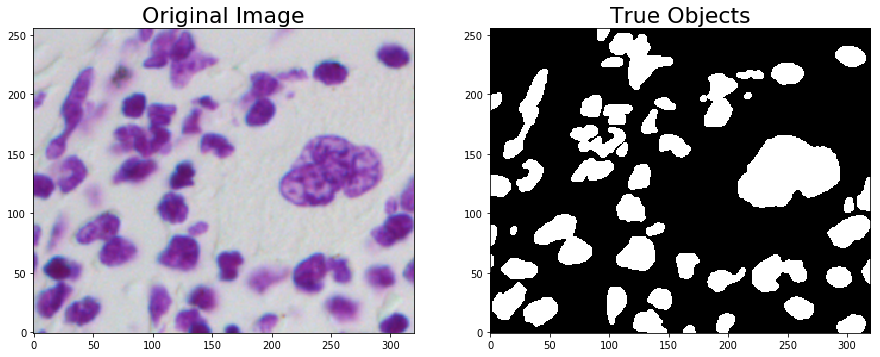

In [20]:
# WORKING EXAMPLE OF load_zipped_img

(img, masks) = load_zipped_img(path+'/stage1_train.zip',510)

fig, ax = plt.subplots(1,2, figsize = (15,10))
ax[0].imshow(img, origin='lower')
ax[0].set_title('Original Image', fontsize=title_size)
ax[1].imshow(sum(masks), origin='lower', cmap='bone')
ax[1].set_title('True Objects', fontsize=title_size)
plt.show()

# Detection: Separating Object from Background

Before determining the positions of nuclei in an image, it is key to separate the image from the background using a process called image detection. This is typically done by thresholding - all pixels below some certain threshold are classified background (0) and all pixels above some certain threshold are classified object (1). We use Otsu's method to find the optimum threshold by searching exhaustively for a threshold such that inter-class variance is maximized (equivalent to saying that intra-class variance is minimized).

* The grayscale function converts images from rgb to grayscale
* The otsu function selects an optimal threshold for equal inter-/intra-class variance
* The function float2int8 converts the data type to int8, which is required for the cv2 package

In [8]:
# convert to grayscale
def grayscale(im):
    return rgb2gray(im)

# Otsu's method
def otsu(image_gray):
    threshold_val = threshold_otsu(image_gray) #Select threshold from Otsu's method
    img_masked = np.where(image_gray > threshold_val, 1, 0)

    if np.sum(img_masked==0) < np.sum(img_masked==1):
        img_masked = np.where(img_masked, 0, 1)
    return img_masked

# Function to convert float32 raw images to int8 single channel
def float2int8(img_float):
    img_int8 = (img_float * 255).round().astype(np.uint8)
    return img_int8

# Segmentation: Separating Individual Objects

After thresholding to binarize an image into object and background pixels, the next step is separating the object pixels into individual cells. We tried watershed segmentation and (active) contouring, two techniques commonly used in literature, and compared accuracy against a Random Forest classifier.

## Watershed algorithm

Watershed segmentation treats a grayscale image like a topographic map. We flood the landscape by filling up the brightest areas first, and also preventing waters from different sources to mix. Together, these effectively define watershed lines (the edges of objects) and separate catchment basins (the objects we are trying to identify). The general algorithm is as follows
* start with grayscale image
* threshold (we used Otsu's method) to get an initial prediction of objects
* remove noise via opening and/or Gaussian blurring (we used opening)
* apply distance transform, which turns a binary image into gradient map (brightest areas are 1)
* find sure background by expanding the borders of objects (dilation)
* find sure foreground by shrinking the borders of objects (erosion) until they are no longer touching
* flood the distance transformed image to recalculate new borders of objects as the watershed lines

<u>Advantages</u>: watershed segmentation is intuitive, parallelizable, and the resulting boundaries always form closed and connected regions

<u>Disadvantages</u>: watershed tends to over-segment, unable to capture cell overlap (because we prevent waters from merging) if the seeds (initial basins) are not well chosen

```watershed``` takes an image and outputs
* ```img_guess```: the binarized image guessed by watershed segmentation (watershed lines = cell outlines in red)
* ```markers```: separated cells identified by watershed segmentation (the catchment basis)
* ```sure_bg```: certain background pixels
* ```sure_fg```: certain object pixels
* ```uncertain```: the region between sure_bg and sure_fg

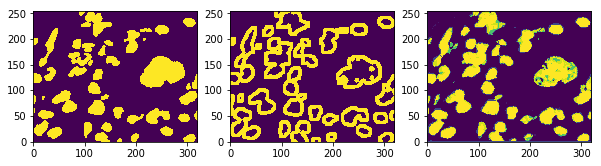

In [10]:
# Function to watershed segment images
def watershed(img_float32):
    img = img_float32[:, :, :3]
    
    # convert input image (float32) to 3-channel int8
    ch1 = float2int8(otsu(img[:,:,0:1][:,:,0]))
    ch2 = float2int8(otsu(img[:,:,1:2][:,:,0]))
    ch3 = float2int8(otsu(img[:,:,2:3][:,:,0]))
    img_guess = cv2.merge([ch1,ch2,ch3])
    
    # greyscale and otsu threshold original image
    img_grey = grayscale(img)
    int8_thresh = float2int8(otsu(img_grey))

    # noise removal
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(int8_thresh,cv2.MORPH_OPEN,kernel,iterations=2)
    
    # find sure background area
    sure_bg = cv2.dilate(opening,kernel,iterations=3)
    
    # find sure foreground area
    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    ret, sure_fg = cv2.threshold(dist_transform,0.2*dist_transform.max(),255,0)
    sure_fg = np.uint8(sure_fg)

    # finding uncertain region
    uncertain = cv2.subtract(sure_bg,sure_fg)
    
    # marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)
    markers = markers+1 # add one to all labels so sure background is 1 (not 0)
    markers[uncertain==255] = 0 # mark unknown region as 0

    # apply watershed and mark boundary as -1
    markers = cv2.watershed(img_guess, markers)
    img_guess[markers == -1] = [255,0,0]

    return img_guess, markers, sure_bg, sure_fg, uncertain


# WORKING EXAMPLE OF watershed

(img, mask) = load_zipped_img(path+'/stage1_train.zip', 510)

img_guess, markers, sure_bg, sure_fg, uncertain = watershed(img)

fig, ax = plt.subplots(1,3, figsize = (10,10))

ax[0].imshow(sum(mask), origin='lower')
ax[1].imshow(uncertain, origin='lower')
ax[2].imshow(grayscale(img_guess), origin='lower')
plt.show()

True objects(left), "uncertain area" that we later train classifiers/dimensional reduction on (center), objects predited by watershed (right)

## Edge detection algorithm

The interface between two contiguous homogeneous regions is usually a discontinuity in grey-level/colour, texture, or motion. These discontinuities can be located using edge detection algorithms that look for local gradient maxima
$$\nabla f = \begin{bmatrix} G_x \\ G_y \end{bmatrix} = \begin{bmatrix} \frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y} \end{bmatrix}$$

<b>Simple edge detection</b><br>
Detect cells as ellipses.

<b>Active contour method ("greedy snake")</b><br>
A snake (contour) is an elastic, deformable, energy-minimizing spline defined by $n$ points ${v} _{i}$ where $i=0 \ldots n-1$. Joint level set optimization, essentially a fancy gradient descent method, is often used to energy minimize the snake's Hamiltonian
$$ E_{snake} = \int E_{snake} ds = \int (E_{internal} + E_{image} + E_{constraints} ) ds $$
The internal energy of the snake depends on the continuity and curvature of the contour, and the constraint energy allows initial points to be placed and the subsequently evolved to guide the snake towards or away from features in the image. The external energy is most commonly modified; there are many derivative methods and ways to process the features in the image, or even the image itself. Usually an image can be broken down into (weighted) functionals that describe the edges, lines, and terminations.

<u>Advantages</u>: autonomously and adaptively searches for minimum state, external forces are intuitive, good at tracking dynamic objects, can be scale invariant

<u>Disadvantages</u>: sensitive to local minima states, often miss small/sutle features in the image, accuracy and speed depend on convergence algorithm

```contouring``` takes an image and outputs
* ```img_contouring```: the raw image with circular and rectangle contours detected

In [84]:
# Function to contour segment images
def contouring(img_float32, borderSize, gap, draw='off'):  
    img = float2int8(img_float32[:, :, :3])

    # perform a BGR->HSV conversion and use the V channel for processing
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # threshold, apply morphological closing, then take the distance transform (dist)
    th, bw = cv2.threshold(float2int8( hsv[:, :, 2] ), 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    morph = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)
    dist = cv2.distanceTransform(morph, cv2.DIST_L2, cv2.DIST_MASK_PRECISE)
    distborder = cv2.copyMakeBorder(dist, borderSize, borderSize, borderSize, borderSize, cv2.BORDER_CONSTANT | cv2.BORDER_ISOLATED, 0)

    # create a template, take its distance transform and use it as the template (temp)
    kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*(borderSize-gap)+1, 2*(borderSize-gap)+1))
    kernel2 = cv2.copyMakeBorder(kernel2, gap, gap, gap, gap, cv2.BORDER_CONSTANT | cv2.BORDER_ISOLATED, 0)
    distTempl = cv2.distanceTransform(kernel2, cv2.DIST_L2, cv2.DIST_MASK_PRECISE)

    # template matching (dist*temp)
    nxcor = cv2.matchTemplate(distborder, distTempl, cv2.TM_CCOEFF_NORMED)

    # find local maxima of the resulting image, positions correspond to circle centers and values correspond to radii
    mn, mx, _, _ = cv2.minMaxLoc(nxcor)

    # thresholding template matched image
    th, peaks = cv2.threshold(nxcor, mx*0.5, 255, cv2.THRESH_BINARY)
    peaks8u = cv2.convertScaleAbs(peaks)
    _, contours, _ = cv2.findContours(peaks8u, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    # peaks8u = cv2.convertScaleAbs(peaks)    # to use as mask

    # detecting circles as local maxima
#     if draw == 'on':
    for i in range(len(contours)):
        x, y, w, h = cv2.boundingRect(contours[i])
        _, mx, _, mxloc = cv2.minMaxLoc(dist[y:y+h, x:x+w], peaks8u[y:y+h, x:x+w])
        cv2.circle(img, (int(mxloc[0]+x), int(mxloc[1]+y)), int(mx), (255, 0, 0), 2)
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 255), 2)
        cv2.drawContours(img, contours, i, (0, 0, 255), 2)
            
    img_contoured = img

    return img_contoured

# WORKING EXAMPLE OF contouring
# (img, mask) = load_zipped_img(path+'/stage1_train.zip', 177)
# img_guess, markers, sure_bg, sure_fg, uncertain = watershed(img)

# # one way of determining borderSize and gap
# num_markers = np.max(markers)
# obj_size = []
# for i in range(1, num_markers):
#     obj_size.append(len(markers[markers==i]))

# min_size = min(a for a in obj_size)
# max_size = max(a for a in obj_size)
# avg_size = np.sum(obj_size)/num_markers

# borderSize = int(np.sqrt(5000))
# gap = int(borderSize/10)

# img_contoured = contouring(img, borderSize, gap, draw='off')

# fig, ax = plt.subplots(1,3, figsize = (15,15))

# ax[0].imshow(sum(mask), origin='lower')
# ax[1].imshow(img_contoured, origin='lower')
# ax[2].imshow(img_guess, origin='lower')
# plt.show()

## Random forest classification


Random forest classifiers are ensemble learning methods that construct a "forest" of decision tree classifiers and return the mode of the individual trees. correct for decision trees' habit of overfitting to their training set.

<u>Advantages</u>: scale invariant, transformation invariant, robust to inclusion of irrelevant features, good accuracy (low variance) since they correct for decision trees' overfitting

<u>Disadvantages</u>: less inspectable than decision trees

X = feature vector (6 columns):
* grayscale pixel intensity (continuous)
* watershed prediction for a pixel (discrete)
* magnitude of the Sobel gradient or Laplacian of pixel intensity (discrete)
* intensity for each of the rgb colour channels (continuous)

Y = a vector containing the sum of the one-indexed masks for each image (the correct nuclei)

In [85]:
x_train = np.zeros(7).reshape(1,7) # Feature vector
y_train = np.zeros(1) # True pixel values

for i in range(0, n_samples):
    (img, masks) = load_zipped_img(path+'/stage1_train.zip', i) # loads image and associated masks

    (img_guess, markers, sure_bg, sure_fg, uncertain) = watershed(img)

    intensity = grayscale(img)
    img_guess = grayscale(img_guess)
    
    filter_sobel = sobel(grayscale(img))[uncertain==255].reshape(-1,1)
    filter_laplace = laplace(grayscale(img))[uncertain==255].reshape(-1,1)
    
    intensity_raw = intensity[uncertain==255].reshape(-1,1)
    watershed_predict = img_guess[uncertain==255].reshape(-1,1)
    
    img3 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    r,g,b = cv2.split(img3)
    
    r = r[uncertain==255].reshape(-1,1)
    g = g[uncertain==255].reshape(-1,1)
    b = b[uncertain==255].reshape(-1,1)
    
    feature = np.concatenate((intensity_raw, watershed_predict, filter_sobel, filter_laplace, r, g, b), axis = 1)
    y_raw = sum(masks)
    y_raw = y_raw[uncertain==255].reshape(-1,1)
    
    x_train = np.append(x_train, feature).reshape(-1,7)
    y_train = np.append(y_train, y_raw).reshape(-1,1)

x_train = x_train[1:,:]
y_train = y_train[1:,0]

clf = RandomForestClassifier(max_depth=5, random_state=0)
%time clf.fit(x_train, y_train)

CPU times: user 1.73 s, sys: 56.5 ms, total: 1.78 s
Wall time: 1.79 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

# Model Validation

Quantify error of different models
* Compute confusion matrix to find number of false positives (FP), false negatives (FN), true positive (TP), true negatives (TN)
* Quantify error by calculating precision, accuracy, recall, and f1 score
* Use cross-validation to tune hyperparameters

<b>Detection accuracy metric</b><br>
The fit target Y is sum of all true masks = true foreground
* accuracy = (TP + TN) / (TP + FP + TN + FN) = (TP + TN) / (Total)
* precision = (TP) / (TP + FP)
* recall = (TP) / (TP + FN)
* f1 = 2$*$(precision $*$ recall) / (precision + recall)

<b>Segmentation accuracy metric</b><br>
The fit target Y is individual masks for each nuclei. Intersection over union (IoU) of a proposed set of object pixels A and a set of true object pixels B is calculated as 
$IoU(A,B) = \frac{A \cap B}{A \cup B}$

In [86]:
# separates the objects in an image after a thresholding method has been applied
def separate_obj(img_masked):
    labels, nlabels = ndimage.label(img_masked)

    label_arrays = []
    for label_num in range(1, nlabels+1):
        label_mask = np.where(labels == label_num, 1, 0)
        label_arrays.append(label_mask)
    return labels, nlabels, label_mask

# separates a sum of masks into individual masks
def predicted_mask_list(total_mask): 
    obj_detected = np.max(total_mask) + 1
    mask_list_pred = []
    for i in range(1, obj_detected):
        mask_p = total_mask == i*np.ones(total_mask.shape)
        mask_list_pred.append(mask_p)
        
    return mask_list_pred

# determines intersection over union metric
def iou(img, predicted_masks, real_masks): 
    mask_iou = []
    mask_num = len(masks)
    
    pred_mask_num = len(predicted_masks)
    for i in range(0, mask_num):
        individual_mask = masks[i]
        best_match = 0
        nearest_mask = 0
        for j in range(0, pred_mask_num):
            match = np.sum(predicted_masks[j] == real_masks[i])
            
            if match > best_match:
                nearest_mask = j
                best_match = match
       
        m = real_masks[i]
            
        mask_i = np.sum(m[predicted_masks[nearest_mask] == 1])
        mask_u = np.sum(predicted_masks[nearest_mask] == 1) + np.sum(m == 1) - mask_i
        mask_iou.append(mask_i/mask_u)
            
    return mask_iou

In [91]:
score_watershed = []
score_rfc = []

bad_list = []
for i in range(0, n_samples):
    (img, masks) = load_zipped_img(path+'/stage1_train.zip', i)

    y_real = sum(masks).reshape(-1,1)
    shap = grayscale(img).shape
    
    # watershed prediction
    (img_guess, markers, sure_bg, sure_fg, uncertain) = watershed(img)
    
    # watershed score
    yp_watershed = np.round(grayscale(img_guess)).reshape(-1,1)
    acc_watershed = sklearn.metrics.accuracy_score(y_real, yp_watershed)
    prec_watershed = sklearn.metrics.precision_score(y_real, yp_watershed)
    f1_watershed = sklearn.metrics.f1_score(y_real, yp_watershed)
    labels_watershed, nlabels_watershed, label_mask_watershed = separate_obj(yp_watershed.reshape(shap[0], shap[1]))
    masks_watershed = predicted_mask_list(labels_watershed)
    iou_watershed = iou(yp_watershed, masks_watershed, masks)
    score_watershed.append([acc_watershed, prec_watershed, f1_watershed, np.mean(iou_watershed)])
    
    # random forest prediction
    intensity = grayscale(img)
    intensity_raw = intensity.reshape(-1,1)
    watershed_raw = grayscale(img_guess).reshape(-1,1)
    filter_sobel = sobel(grayscale(img)).reshape(-1,1)
    filter_laplace = laplace(grayscale(img)).reshape(-1,1)
    img3 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    ch1,ch2,ch3 = cv2.split(img3)
    ch1 = ch1.reshape(-1,1)
    ch2 = ch2.reshape(-1,1)
    ch3 = ch3.reshape(-1,1)
    feature = np.concatenate((intensity_raw,watershed_raw, filter_sobel, filter_laplace, ch1, ch2, ch3), axis = 1)

    # random forest score
    yp_rfc = clf.predict(feature)
    y_real = sum(masks).reshape(-1,1)
    acc_rfc = sklearn.metrics.accuracy_score(y_real, yp_rfc)
    prec_rfc = sklearn.metrics.precision_score(y_real, yp_rfc)
    f1_rfc = sklearn.metrics.f1_score(y_real, yp_rfc)
    labels_rfc, nlabels_rfc, label_mask_rfc = separate_obj(grayscale(yp_rfc.reshape(shap[0], shap[1])))
    masks_rfc = predicted_mask_list(labels_rfc)
    iou_rfc = iou(yp_rfc, masks_rfc, masks)
    score_rfc.append([acc_rfc, prec_rfc, f1_rfc, np.mean(iou_rfc)])
    
    if (prec_watershed < 0.7) or (acc_watershed < 0.7):
        bad_list.append(i)

ws = np.array(score_watershed)
rfc = np.array(score_rfc)
print(bad_list)
print('Average accuracy: watershed = {0}% ; random forest = {1}%'.format(np.mean(ws[:,0])*100, np.mean(rfc[:,0])*100))
print('Average precision: watershed = {0}% ; random forest = {1}%'.format(np.mean(ws[:,1])*100, np.mean(rfc[:,1])*100))
print('Average f1-score: watershed = {0}% ; random forest = {1}%'.format(np.mean(ws[:,2])*100, np.mean(rfc[:,2])*100))
print('Average IoU: watershed = {0}% ; random forest = {1}%'.format(np.mean(ws[:,3])*100, np.mean(rfc[:,3])*100))
# df_score = pd.DataFrame({'acc_watershed': ws[:,0], 'prec_watershed': ws[:,1], 
#                          'f1_watershed': ws[:,2], 'avgIoU_watershed': ws[:,3],
#                          'acc_randomforest': rfc[:,0], 'prec_randomforest': score_rfc[:,1], 
#                          'f1_randomforest': rfc[:,2], 'avgIoU_randomforest': rfc[:,3],
#                         }) 
# df_score.to_csv('summary_model_validation')

[3]
Average accuracy: watershed = 96.5095481964243% ; random forest = 96.94593349345611%
Average precision: watershed = 91.68672162791184% ; random forest = 82.72161583181739%
Average f1-score: watershed = 87.26178163206356% ; random forest = 85.61611241929876%
Average IoU: watershed = 60.832615239609765% ; random forest = 57.54850661491695%


# Analysis and Improvements: Some Worked Better than Others

As seen above, we have high scores for detection but lower scores for image segmentation. A significant challenge is that imaging, staining, and sample preparation conditions can vary dramatically. There does not exist a "general" method capable of accurate nucleus segmentation across cell types and image types.

We hypothesized that applying preliminary dimensional reduction to the training set could separate out "classes" of images. By asessing the fit for different types of thresholding/segmentation, we might be able to process each set of images individually. Unfortunately, PCA and SVM methods both required enormous amounts of time to train (the largest images have 1445320 pixels, giving us a dataset that is N = 665 by D = 1445320)

Clustering was much faster, and indeed we were able to identify 6 classes of images. Ultimately, adding this further classification to the Random Forest classifier did not improve accuracy.

However, visually inspecting the different classes allowed us to do post-training processing on images with low precision scores (precision tends to be more important because accuracy may be inflated if there is more background in the image; i.e. we get more background pixels correct). Typically, those are images where instead of having two primary levels of contrast, there are several levels corresponding to background, cytoplasm, and nucleus. In those cases, we found that adjusting the thresholding allowed to to obtain significantly improved accuracy.

The adjusted training dataset was then used to re-train our Random Forest model, which was finally applied to predict the test data.

## K-means clustering

The k-means algorithms partitions observations (feature vectors) in the given data into $k$ mutually exclusive clusters such that each point belongs to the cluster with the nearest mean, which is measured by the Euclidean distance.

<u>Advantages</u>: efficient, easy to implement, easy to interpret

<u>Disadvantages</u>: different results with each run depending on the initial random assignments, does not ensure results has global minimum variance, needs to known how many clusters to find

To choose a feature vector, we can look at the images in the training set and see immediately that they tend to differ based on both cell features (geometry, shape, etc) and colour. Therefore we train a k-means clustering algorithm on geometry features and colour features, then combine the resulting classes to get six (6) overall classes.

Geometry feature vector:
* max contour area value per image
* mean contour area value per image
* number of contours per image
* average value of gray pixels per image
* width per image
* length per image

Colour feature vector:
* red per image
* green per image
* blue per image

In [94]:
# Get image information, apply clustering
def get_image_info(samples):
    # geometry features
    max_cnt_area = [] # max contour area value per image   
    avg_cnt_area = [] # mean contour area value per image
    num_cnt = [] # how many contour areas per image
    wid_list = [] #  width per image
    len_list = [] #  length per image
    # colour features
    avg_grey = [] # average value of gray pixels per image
    r = [] #  red per image
    g = [] # green  
    b = [] # blue
    
    for i in samples:
        (img, masks) = load_zipped_img(path+'/stage1_train.zip', i) 
        r.append(np.average(img[:,:,0]))
        g.append(np.average(img[:,:,1]))
        b.append(np.average(img[:,:,2]))
        img = float2int8(grayscale(img))
        
        # in some cases, image background is bright and cell darker, there needs a inverse of pixel value
        if np.average(img) > 125:
            img = 255 - img

        length = img.shape[0]
        len_list.append(length)
        width = img.shape[1]
        wid_list.append(width)
        avg_grey.append(np.average(img))
        
        # use opencv to find contour and get some statistic data
        img = cv2.GaussianBlur(img, (3, 3), 1)
        ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)

        _, cnts, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
        max_cnt_area.append(cv2.contourArea(cnts[0])/length/width)

        av = 0
        for i in cnts:
            av = av + cv2.contourArea(i)
        av = av/len(cnts)
        
        # since different pic has different size, we'd better normalise it 
        avg_cnt_area.append(av/length/width)
        num_cnt.append(len(cnts))
        
    df = pd.DataFrame({'max_area':max_cnt_area,'average_area':avg_cnt_area,
                       'num_cnt':num_cnt,'average_grey':avg_grey,'wid':wid_list,'len':len_list,
                       'r':r,'g':g,'b':b
                      }) 
    return df

df_kmeans = get_image_info(range(0,n_samples))

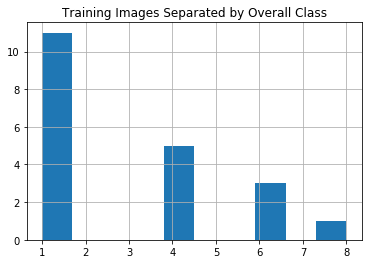

In [102]:
from sklearn.cluster import KMeans 

# train geometry classes
input_geometry = np.array(df_kmeans[['max_area','average_area','num_cnt','average_grey','wid','len']])
geometry_kmeans = KMeans(n_clusters = 3).fit(input_geometry) 
df_kmeans['geometry_class'] = geometry_kmeans.labels_

# train colour classes
input_colour = np.array(df_kmeans[['r','g','b']])
colour_kmeans = KMeans(n_clusters = 3).fit(input_colour) 
df_kmeans['colour_class'] = colour_kmeans.labels_

# and then make a combination
df_kmeans['overall_class'] = 3*df_kmeans['geometry_class']
df_kmeans['overall_class'] = df_kmeans['overall_class'] + df_kmeans['colour_class']

# plot and save
df_kmeans['overall_class'].hist()
plt.title('Training Images Separated by Overall Class')
plt.show()

df_kmeans.to_csv('summary_kmeans')

# Retraining and Testing

In [103]:
x_train = np.zeros(7).reshape(1,7) # Feature vector
y_train = np.zeros(1) # True pixel values

for i in range(0, n_samples):
    (img, masks) = load_zipped_img(path+'/stage1_train.zip', i) # loads image and associated masks

    (img_guess, markers, sure_bg, sure_fg, uncertain) = watershed(img)

    intensity = grayscale(img)
    if i in bad_list: intensity[intensity < 0.5] = [0]
    
    img_guess = grayscale(img_guess)
    
    filter_sobel = sobel(grayscale(img))[uncertain==255].reshape(-1,1)
    filter_laplace = laplace(grayscale(img))[uncertain==255].reshape(-1,1)
    
    intensity_raw = intensity[uncertain==255].reshape(-1,1)
    watershed_predict = img_guess[uncertain==255].reshape(-1,1)
    
    img3 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    r,g,b = cv2.split(img3)
    
    r = r[uncertain==255].reshape(-1,1)
    g = g[uncertain==255].reshape(-1,1)
    b = b[uncertain==255].reshape(-1,1)
    
    feature = np.concatenate((intensity_raw, watershed_predict, filter_sobel, filter_laplace, r, g, b), axis = 1)
    y_raw = sum(masks)
    y_raw = y_raw[uncertain==255].reshape(-1,1)
    
    x_train = np.append(x_train, feature).reshape(-1,7)
    y_train = np.append(y_train, y_raw).reshape(-1,1)

x_train = x_train[1:,:]
y_train = y_train[1:,0]

clf_improved = RandomForestClassifier(max_depth=5, random_state=0)
%time clf_improved.fit(x_train, y_train)

CPU times: user 1.73 s, sys: 55.4 ms, total: 1.78 s
Wall time: 1.79 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [104]:
score_rfc_improved = []

for i in range(0, n_samples):
    (img, masks) = load_zipped_img(path+'/stage1_train.zip', i)

    y_real = sum(masks).reshape(-1,1)
    shap = grayscale(img).shape
    
    (img_guess, markers, sure_bg, sure_fg, uncertain) = watershed(img)
      
    # random forest prediction
    intensity = grayscale(img)
    if i in bad_list: intensity[intensity < 0.5] = [0]
    intensity_raw = intensity.reshape(-1,1)
    watershed_raw = grayscale(img_guess).reshape(-1,1)
    filter_sobel = sobel(grayscale(img)).reshape(-1,1)
    filter_laplace = laplace(grayscale(img)).reshape(-1,1)
    img3 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    ch1,ch2,ch3 = cv2.split(img3)
    ch1 = ch1.reshape(-1,1)
    ch2 = ch2.reshape(-1,1)
    ch3 = ch3.reshape(-1,1)
    feature = np.concatenate((intensity_raw, watershed_raw, filter_sobel, filter_laplace, ch1, ch2, ch3), axis = 1)

    # random forest score
    yp_rfc = clf_improved.predict(feature)
    y_real = sum(masks).reshape(-1,1)
    acc_rfc = sklearn.metrics.accuracy_score(y_real, yp_rfc)
    prec_rfc = sklearn.metrics.precision_score(y_real, yp_rfc)
    f1_rfc = sklearn.metrics.f1_score(y_real, yp_rfc)
    labels_rfc, nlabels_rfc, label_mask_rfc = separate_obj(grayscale(yp_rfc.reshape(shap[0], shap[1])))
    masks_rfc = predicted_mask_list(labels_rfc)
    iou_rfc = iou(yp_rfc, masks_rfc, masks)
    score_rfc_improved.append([acc_rfc, prec_rfc, f1_rfc, np.mean(iou_rfc)])

new = np.array(score_rfc_improved)
print(bad_list)
print('Random forest accuracy: improved = {0}% ; previous = {1}%'.format(np.mean(new[:,0])*100, np.mean(rfc[:,0])*100))
print('Random forest precision: improved = {0}% ; previous = {1}%'.format(np.mean(new[:,1])*100, np.mean(rfc[:,1])*100))
print('Random forest f1-score: improved = {0}% ; previous = {1}%'.format(np.mean(new[:,2])*100, np.mean(rfc[:,2])*100))
print('Random forest IoU: improved = {0}% ; previous = {1}%'.format(np.mean(new[:,3])*100, np.mean(rfc[:,3])*100))

[3]
Random forest accuracy: improved = 96.83290058185483% ; previous = 96.94593349345611%
Random forest precision: improved = 81.42443498778592% ; previous = 82.72161583181739%
Random forest f1-score: improved = 84.79211315800211% ; previous = 85.61611241929876%
Random forest IoU: improved = 56.09902607585761% ; previous = 57.54850661491695%


# Working Example of the Code

* Demonstrates the methods involved using a smaller set of 30 training images
* Evaluates performance based on a confusion matrix and accuracy (compared to the true masks)

# Optional: Data Shape Manipulation

* The function one_index takes an image (2d array) and converts it to a 1d array. They are indexed from top to bottom then left to right
* The function pad_normalize helps account for variation in image sizes. It determines the maximum length in a set of one-indexed images and "pads" all other one-indexed images with zeros so that all images have the same length.

# Optional: Scripts to Encode Outputs for Kaggle

* The function convert2runlength finds the objects in an image (1 corresponds to object, 0 to background) and finds runs of continuous object pixels
* The function rle generates a dataframe of images in run-length format. This is the output format required by the Kaggle competition

In [105]:
# one-indexes a 2d array into 1d, top down then left right, output is np 1d array
def one_index(arr2d):
    h, w = arr2d.shape[0:2]
    
    arr1d = []
    for col in range(0, w):
        for row in range(0, h):
            arr1d.append(arr2d[row][col])
    return np.array(arr1d)
    
# pads all vectors in array to have max_len, returns np array
def pad_normalize(array, max_len):
    for i in range(0, len(array)):
        vec = array[i]
        if len(vec) < max_len:
            array[i] = np.concatenate(( np.array(vec).reshape(1,-1), np.zeros((1, (max_len-len(vec)))) ), axis=1)
        else:
            array[i] = np.array(vec).reshape(1,-1)
    return np.array(array)

# convert path to run-length encoding (RLE) output format
def convert2runlength(x):
    obj = np.where(x.T.flatten()==1)[0] #1 corresponds to object, 0 to background
    run_lengths = []
    prev = -2
    for b in obj: # find continuous set of object pixels
        if (b>prev+1): run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
    return " ".join([str(i) for i in run_lengths])

def rle(img_masked, im_id):
    (labels, nlabels, label_mask) = separate_obj(img_masked)
    im_df = pd.DataFrame()
    for label_num in range(1, nlabels+1):
        label_mask = np.where(labels == label_num, 1, 0)
        if label_mask.flatten().sum() > 10:
            rle = convert2runlength(label_mask)
            s = pd.Series({'ImageId': im_id, 'EncodedPixels': rle})
            im_df = im_df.append(s, ignore_index=True)
    return im_df